In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp

In [3]:
df_19 = pd.read_csv('..\\..\\raw data\\df_19.csv')

In [4]:
df_19

,Nombre Sección,Sección,Total,censo,votos_total,Participación
0,Abaltzisketa sección 01001,101001,17166.0,253.0,163.0,0.644269
1,Aduna sección 01001,201001,16825.0,359.0,234.0,0.651811
2,Aizarnazabal sección 01001,301001,14763.0,549.0,360.0,0.655738
3,Albiztur sección 01001,401001,16659.0,230.0,133.0,0.578261
4,Alegia sección 01001,501001,14319.0,1274.0,822.0,0.645212
...,...,...,...,...,...,...
541,Baliarrain sección 01001,90401001,15116.0,87.0,56.0,0.643678
542,Orendain sección 01001,90501001,16087.0,160.0,123.0,0.768750
543,Altzaga sección 01001,90601001,14018.0,128.0,87.0,0.679688
544,Gaztelu sección 01001,90701001,13812.0,118.0,82.0,0.694915


In [5]:
df_16 = pd.read_csv('..\\..\\raw data\\df_16.csv')

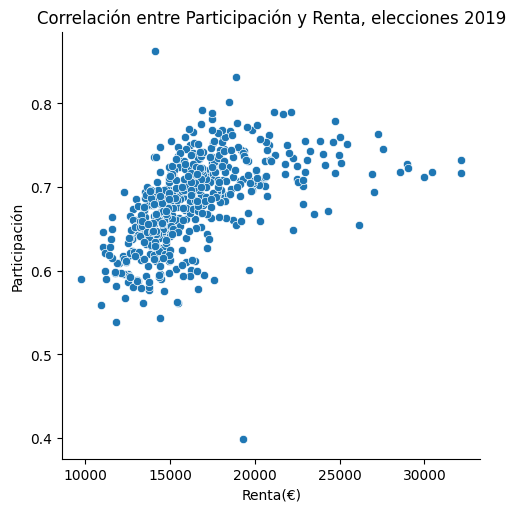

In [6]:
sns.relplot(data=df_19, y="Participación", x="Total").set(title='Correlación entre Participación y Renta, elecciones 2019')
plt.xlabel('Renta(€)');

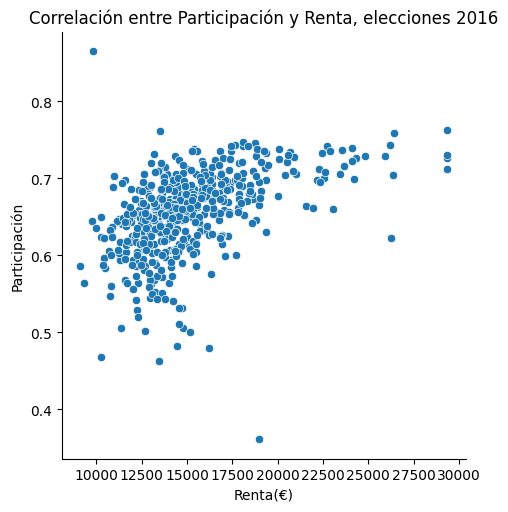

In [7]:
sns.relplot(data=df_16, y="Participación", x="Total").set(title='Correlación entre Participación y Renta, elecciones 2016')
plt.xlabel('Renta(€)');

In [8]:
df_16[df_16['Total'].isna()]

,Nombre Sección,Sección,Total,censo,votos_total,Participación
545,NaN,999090000,NaN,5723.0,2768.0,0.483662


In [9]:
df_16[df_16['Participación'].isna()]

,Nombre Sección,Sección,Total,censo,votos_total,Participación
346,Donostia/San Sebastián sección 03033,6903033,15063.0,NaN,NaN,NaN
347,Donostia/San Sebastián sección 03034,6903034,15063.0,NaN,NaN,NaN


In [10]:
df_19[df_19['Participación'].isna()]

,Nombre Sección,Sección,Total,censo,votos_total,Participación
347,Donostia/San Sebastián sección 03034,6903034,17779.0,NaN,NaN,NaN


In [11]:
df_19[df_19['Total'].isna()]

,Nombre Sección,Sección,Total,censo,votos_total,Participación
545,NaN,999090000,NaN,7894.0,3083.0,0.39055


In [12]:
df_19['Total'].fillna(value=df_19['Total'].mean(), inplace=True)

In [13]:
df_19 = df_19.drop([347],axis=0)

In [14]:
df_16 = df_16.drop([346,347],axis=0)

In [15]:
df_16['Total'].fillna(value=df_16['Total'].mean(), inplace=True)

In [24]:
df_16.to_csv('..\\..\\raw data\\df_16_corr.csv', index=False)

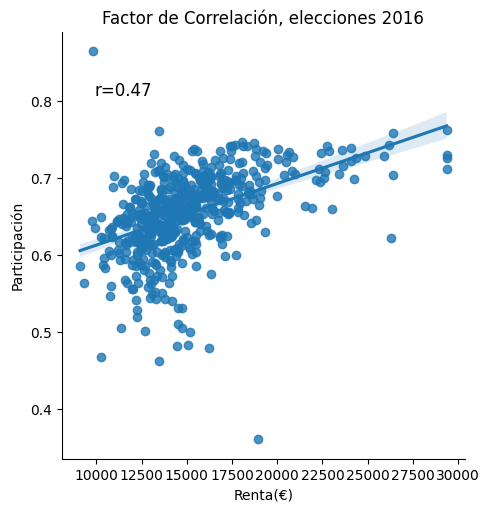

In [16]:
sns.lmplot(data=df_16, y="Participación", x="Total").set(title='Factor de Correlación, elecciones 2016')
r, p = sp.stats.pearsonr(x=df_16["Total"], y=df_16['Participación'])
ax = plt.gca()
plt.text(.08, .85, 'r={:.2f}'.format(r),fontsize='large',transform=ax.transAxes)
plt.xlabel('Renta(€)');

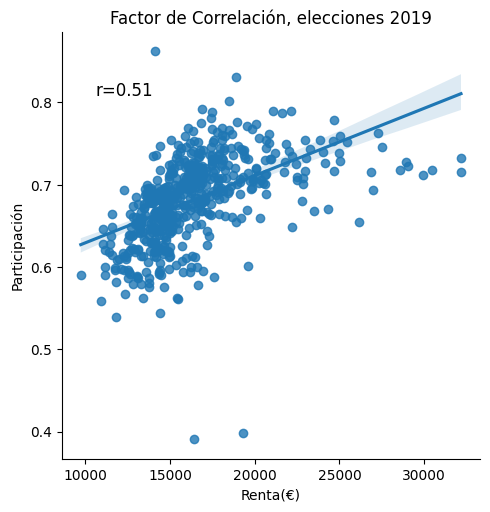

In [17]:
sns.lmplot(data=df_19, y="Participación", x="Total").set(title='Factor de Correlación, elecciones 2019')
r, p = sp.stats.pearsonr(x=df_19["Total"], y=df_19['Participación'])
ax = plt.gca()
plt.text(.08, .85, 'r={:.2f}'.format(r),fontsize='large',transform=ax.transAxes)
plt.xlabel('Renta(€)');

In [18]:
df_16['Total'].corr(df_16['Participación'])

0.4745830971652087

In [19]:
df_19['Total'].corr(df_19['Participación'])

0.5106283407120119

Queda pues la hipótesis primaria, "Cuanto mayor la renta, mayor la participación" corroborada en los dos procesos electorales.
### Pero: ¿No estaremos sufriendo una paradoja de Simpson? Chequeemos por cuartos para asegurarnos.

Chequearemos en el resultado de 2019, la que tiene una correlación más marcada


In [20]:
df_19['cuartil']= pd.qcut(df_19['Total'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
df_19

,Nombre Sección,Sección,Total,censo,votos_total,Participación,cuartil
0,Abaltzisketa sección 01001,101001,17166.000000,253.0,163.0,0.644269,Q3
1,Aduna sección 01001,201001,16825.000000,359.0,234.0,0.651811,Q3
2,Aizarnazabal sección 01001,301001,14763.000000,549.0,360.0,0.655738,Q2
3,Albiztur sección 01001,401001,16659.000000,230.0,133.0,0.578261,Q3
4,Alegia sección 01001,501001,14319.000000,1274.0,822.0,0.645212,Q2
...,...,...,...,...,...,...,...
541,Baliarrain sección 01001,90401001,15116.000000,87.0,56.0,0.643678,Q2
542,Orendain sección 01001,90501001,16087.000000,160.0,123.0,0.768750,Q3
543,Altzaga sección 01001,90601001,14018.000000,128.0,87.0,0.679688,Q1
544,Gaztelu sección 01001,90701001,13812.000000,118.0,82.0,0.694915,Q1


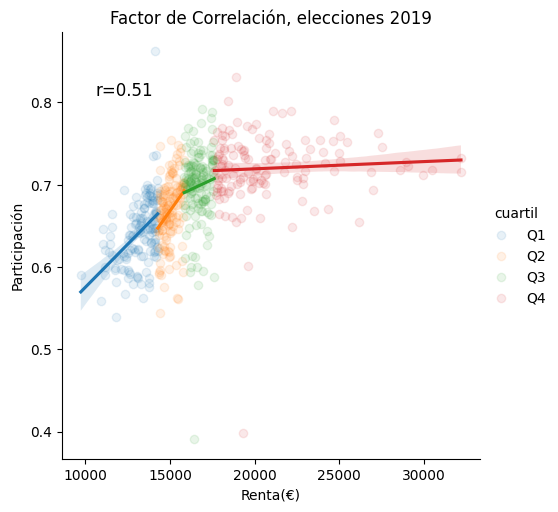

In [21]:
sns.lmplot(data=df_19, y="Participación", x="Total",scatter_kws={'alpha':0.1},hue='cuartil').set(title='Factor de Correlación, elecciones 2019')
r, p = sp.stats.pearsonr(x=df_19["Total"], y=df_19['Participación'])
ax = plt.gca()
plt.text(.08, .85, 'r={:.2f}'.format(r),fontsize='large',transform=ax.transAxes)
plt.xlabel('Renta(€)');

In [22]:
df_16['cuartil']= pd.qcut(df_16['Total'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

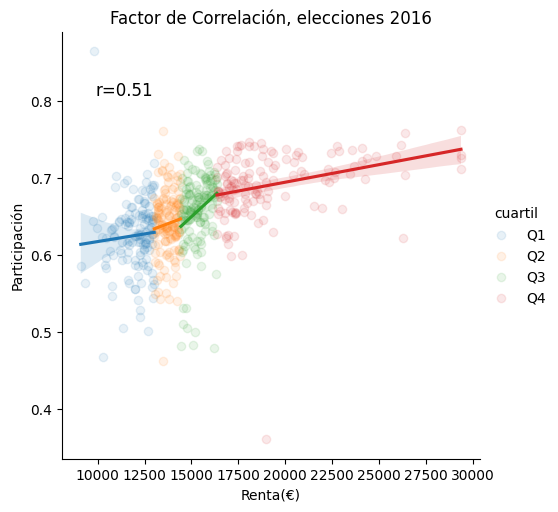

In [23]:
sns.lmplot(data=df_16, y="Participación", x="Total",scatter_kws={'alpha':0.1},hue='cuartil').set(title='Factor de Correlación, elecciones 2016')
r, p = sp.stats.pearsonr(x=df_19["Total"], y=df_19['Participación'])
ax = plt.gca()
plt.text(.08, .85, 'r={:.2f}'.format(r),fontsize='large',transform=ax.transAxes)
plt.xlabel('Renta(€)');

Aunque no se termina de falsear la correlación por una paradoja Simpson, sí que se observa que hay grandes variaciones, incluso llegando en 2019 el cuartil de renta más alto a estar a punto de ir contra la tendencia general de la estadística.
